In [1]:
import os
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.sequence import pad_sequences

%matplotlib inline

In [3]:
!unzip tourism.zip

Archive:  tourism.zip
   creating: tourism/.ipynb_checkpoints/
  inflating: tourism/1_marathilexnew.txt  
   creating: tourism/Marathi Tourism Domain/
   creating: tourism/Marathi Tourism Domain/Marathi Tourism Domain/
  inflating: tourism/Marathi Tourism Domain/Marathi Tourism Domain/0001_mar_tourism.txt  
  inflating: tourism/Marathi Tourism Domain/Marathi Tourism Domain/0002_mar_tourism.txt  
  inflating: tourism/Marathi Tourism Domain/Marathi Tourism Domain/0003_mar_tourism.txt  
  inflating: tourism/Marathi Tourism Domain/Marathi Tourism Domain/0004_mar_tourism.txt  
  inflating: tourism/Marathi Tourism Domain/Marathi Tourism Domain/0005_mar_tourism.txt  
  inflating: tourism/Marathi Tourism Domain/Marathi Tourism Domain/0006_mar_tourism.txt  
  inflating: tourism/Marathi Tourism Domain/Marathi Tourism Domain/0007_mar_tourism.txt  
  inflating: tourism/Marathi Tourism Domain/Marathi Tourism Domain/0008_mar_tourism.txt  
  inflating: tourism/Marathi Tourism Domain/Marathi Tourism D

In [4]:
FILES_PATH2 = "/content/tourism/Marathi Tourism Domain/Marathi Tourism Domain"
FILES_PATH3 = "/content/tourism/Tourism Domain (Training & Testing)/Tourism Training"
FILES_PATH4 = "/content/tourism/Tourism Domain (Training & Testing)/Tourism Testing"

In [5]:
all_lines0 = []
for i in os.listdir(FILES_PATH3):
    if i!=".ipynb_checkpoints":
        text_file = open(os.path.join(FILES_PATH3, i), "r", encoding="utf-8-sig",errors='ignore')
        content = text_file.read()
        content = content.split("\n")
        lines = []
        for i in content:
            lines.append(i.split(" "))
        line_words = []
        for i in lines:
            words = []
            cleaned_words=[]
            for j in i:
                if "\\" in j:
                    words.append(j.split("\\"))
            all_lines0.append(words)

for i in os.listdir(FILES_PATH4):
    if i!=".ipynb_checkpoints":
        text_file = open(os.path.join(FILES_PATH4, i), "r", encoding="utf-8-sig",errors='ignore')
        content = text_file.read()
        content = content.split("\n")
        lines = []
        for i in content:
            lines.append(i.split(" "))
        line_words = []
        for i in lines:
            words = []
            cleaned_words=[]
            for j in i:
                if "\\" in j:
                    words.append(j.split("\\"))
            all_lines0.append(words)            

In [6]:
all_lines0[1]

[['htd21099\tयेथे', 'DM_DMD'],
 ['इतकी', 'QT_QTF'],
 ['वाळू', 'N_NN'],
 ['जमली', 'V_VM'],
 ['होती', 'V_VAUX'],
 ['की', 'CC_CCS'],
 ['कोणालाच', 'DM_DMQ'],
 ['ह्या', 'DM_DMR'],
 ['गोष्टीचा', 'N_NN'],
 ['अंदाज', 'N_NN'],
 ['नव्हता', 'V_VM'],
 ['की', 'CC_CCS'],
 ['खाली', 'N_NST'],
 ['काय', 'PR_PRQ'],
 ['आहे', 'V_VM'],
 ['.', 'RD_PUNC']]

In [7]:
for i in range(len(all_lines0)):
    for j in range(len(all_lines0[i])):
        if j==0:
            if len(all_lines0[i][j][0].split("\t"))==2:
                 all_lines0[i][j][0]=all_lines0[i][j][0].split("\t")[1]

In [8]:
all_lines0[11223]

[['जवळजवळ', 'RB'],
 ['२', 'QT_QTC'],
 ['हजार', 'QT_QTC'],
 ['वर्षापूर्वी', 'N_NN'],
 ['बनलेले', 'V_VM'],
 ['हे', 'DM_DMR'],
 ['मंदिर', 'N_NN'],
 ['समुद्र', 'N_NN'],
 ['देवता', 'N_NN'],
 ['टॉइस्टला', 'N_NNP'],
 ['समर्पित', 'JJ'],
 ['आहे', 'V_VM'],
 ['.', 'RD_PUNC']]

In [10]:
for i in range(len(all_lines0)):
    for j in range(len(all_lines0[i])):
      if len(all_lines0[i][j])!=2:
        all_lines0[i][j].remove(all_lines0[i][j][2])
        print(all_lines0[i][j])

In [11]:
for i in range(len(all_lines0)):
    for j in range(len(all_lines0[i])):
        if all_lines0[i][j][1]=='N_NN' or all_lines0[i][j][1]=='N_NN-' or all_lines0[i][j][1]=='N_NN.' or all_lines0[i][j][1]=='N_NN,':
                all_lines0[i][j][1]='n'
                    
        elif all_lines0[i][j][1]=='N_NST' or all_lines0[i][j][1]=='N_NNP' or all_lines0[i][j][1]=='N_NNP' or all_lines0[i][j][1]=='N_NNP,':      
            all_lines0[i][j][1]='n'
                 
        elif all_lines0[i][j][1]=='JJ' or all_lines0[i][j][1]=='JJ-' or all_lines0[i][j][1]=='JJ' or all_lines0[i][j][1]=='JJस्थळाच्या':   
            all_lines0[i][j][1]='a'
                
        elif all_lines0[i][j][1]=='RB' or all_lines0[i][j][1]=='RB,':
            all_lines0[i][j][1]='r'
                    
        elif all_lines0[i][j][1]=='V_VM' or all_lines0[i][j][1]=='V_VAM.' or all_lines0[i][j][1]=='V_VAX.' or all_lines0[i][j][1]=='V_VAUX' or all_lines0[i][j][1]=='V_VUAX.':   
            all_lines0[i][j][1]='v'

        elif all_lines0[i][j][1]=='V_VM.' or all_lines0[i][j][1]=='V_VAUX.' or all_lines0[i][j][1]=='V_VM':  
            all_lines0[i][j][1]='v'    
                
        else: 
            all_lines0[i][j][1]='u'

In [12]:
all_lines0[2000]

[['थायलंड', 'n'],
 ['येथील', 'u'],
 ['तुमची', 'u'],
 ['सुट्टी', 'n'],
 ['अविस्मरणीय', 'a'],
 ['ठरु', 'v'],
 ['शकते', 'v'],
 ['.', 'u']]

In [13]:
all_lines = []
            
for i in os.listdir(FILES_PATH2):
    if i!=".ipynb_checkpoints":
        text_file = open(os.path.join(FILES_PATH2, i), "r", encoding="utf-8")
        content = text_file.read()
        content = content.split("\n")
        lines = []
        for i in content:
            lines.append(i.split(" "))
        line_words = []
        for i in lines:
            words = []
            for j in i:
                if "#" in j:
                    words.append(j.split("#"))
            all_lines.append(words)

In [14]:
all_lines_word_info = []
for line in all_lines:
    words_info = []
    if line != []:
        for word in line:
            word_info = {}
            word_info["word"] = word[0]
            if word[1] !="" and word[1][0] == "{":
                word_info["root_word"] = word[1][1:len(word[1])-1].split(",")
            else:
                word_info["root_word"] = word[1]
            word_info["pos"] = word[2]
            word_info["word_position"] = word[3]
            word_info["word_id"] = word[4]
            words_info.append(word_info)
        all_lines_word_info.append(words_info)

In [16]:
all_pos0 = []
for i in all_lines0:
    for word in i:
        try:
            if word[1] not in all_pos0:
                all_pos0.append(word[1])
        except:
            pass

In [18]:
all_pos0

['u', 'n', 'v', 'a', 'r']

In [19]:
all_pos = []
for i in all_lines_word_info:
    for word in i:
        try:
            if word["pos"] not in all_pos:
                all_pos.append(word["pos"])
        except:
            pass

In [20]:
all_pos

['u', 'a', 'n', 'v', 'r']

In [21]:
PATH = "/content/tourism/1_marathilexnew.txt"
text_file = open(PATH, "r", encoding="utf-8-sig")
content = text_file.read()

In [22]:
len(content.split("\n"))

28019

In [23]:
all_noun_words = []
all_adjective_words = []
all_verb_words = []
all_adverb_words = []
for word in content.split("\n"):
    if "noun" in word:
        all_noun_words.append(word)
    elif "adjective" in word:
        all_adjective_words.append(word)
    elif "verb" in word:
        all_verb_words.append(word)
    elif "adverb ":
        all_adverb_words.append(word)

In [24]:
print(f"Nouns: {len(all_noun_words)}")
print(f"Adjectives: {len(all_adjective_words)}")
print(f"Verbs: {len(all_verb_words)}")                
print(f"Adverbs: {len(all_adverb_words)}")

Nouns: 16244
Adjectives: 7849
Verbs: 2142
Adverbs: 1784


In [25]:
all_sentences = []
all_tags = []

for line in all_lines_word_info:
    sentence = []
    tag = []
    for word in line:
        sentence.append(word["word"])
        tag.append(word["pos"])
    all_sentences.append(sentence)
    all_tags.append(tag)
    
for line in all_lines0:
    sentence = []
    tag = []
    for word in line:
        sentence.append(word[0])
        tag.append(word[1])
    all_sentences.append(sentence)
    all_tags.append(tag)  

In [26]:
len(all_sentences)

41371

In [27]:
all_new_nouns = ' :: '.join(all_noun_words)
all_new_adjectives = ' :: '.join(all_adjective_words)
all_new_verbs= ' :: '.join(all_verb_words)
all_new_adverbs = ' :: '.join(all_adverb_words)
for index in range(len(all_sentences)):
    sentence = all_sentences[index]
    for i in range(len(sentence)):
        word_pos_tag = all_tags[index][i]
        if word_pos_tag == 'u':
            if sentence[i] in all_new_adjectives:
                all_tags[index][i] = "a"
            elif sentence[i] in all_new_nouns:
                all_tags[index][i] = "n"
            elif sentence[i] in all_new_verbs:
                all_tags[index][i] = "v"
            elif sentence[i] in all_new_adverbs:
                all_tags[index][i] = "r"

In [28]:
print(f"Nouns: {len(all_new_nouns)}")
print(f"Adjectives: {len(all_new_adjectives)}")
print(f"Verbs: {len(all_new_verbs)}")
print(f"Adverbs: {len(all_new_adverbs)}")

Nouns: 317583
Adjectives: 190648
Verbs: 60178
Adverbs: 58307


In [29]:
index = 16117
print(all_sentences[index], len(all_sentences[index]))
print(all_tags[index], len(all_tags[index]))

['पुढे', 'उताराने', 'रस्त्याचे', 'अस्तित्व', 'मिटवले', 'होते', '.'] 7
['n', 'n', 'n', 'n', 'v', 'v', 'n'] 7


In [30]:
all_sent = []
all_tag = []
for i in range(len(all_sentences)):
    if len(all_sentences[i]) != 1:
        all_sent.append(all_sentences[i])
        all_tag.append(all_tags[i])

In [31]:
all_sentences = all_sent
all_tags = all_tag
print(len(all_sentences), len(all_tags))

41160 41160


In [32]:
index = 8
print(all_sentences[index], len(all_sentences[index]))
print(all_tags[index], len(all_tags[index]))

['उत्तरांचलच्या', 'लहान', 'शहरांमध्ये', ',', 'बॅंकांच्या', 'व्यवसायाचे', 'पर्याय', 'पूर्णपणे', 'मर्यादित', 'स्वरूपाचे', 'असतील', ',', 'सरकारी', 'बँकांच्या', 'लहान', 'शाखा', 'निर्बंध', 'असलेल्या', 'आहेत', 'ज्या', 'बर्\u200dयाचशा', 'सुविधा', 'देत', 'नाहीत', 'आणि', 'त्या', 'डॉलर', 'आणि', 'स्टर्लिंग', 'पाऊंड', 'यांच्या', 'व्यतिरिक्त', 'चलन', 'बदली', 'करण्यास', 'असंभवनिय', 'आहेत', 'आणि', 'पुष्कळ', 'वेळा', 'ते', 'सुद्धा', 'करीत', 'नाही', '.'] 45
['n', 'a', 'n', 'a', 'u', 'n', 'n', 'r', 'a', 'u', 'u', 'a', 'a', 'u', 'a', 'n', 'n', 'u', 'v', 'n', 'u', 'n', 'u', 'v', 'r', 'a', 'n', 'r', 'u', 'u', 'u', 'a', 'n', 'a', 'u', 'a', 'v', 'r', 'a', 'n', 'a', 'u', 'v', 'n', 'n'] 45


In [33]:
num_words = len(set([word for sentence in all_sentences for word in sentence]))
num_tags = len(set([tag for sentence_tag in all_tags for tag in sentence_tag]))

In [34]:
words = set([word for sentence in all_sentences for word in sentence])
tags = set([tag for sentence_tag in all_tags for tag in sentence_tag])

In [35]:
print(f"Number of words: {num_words}\nNumber of tags: {num_tags}")

Number of words: 97881
Number of tags: 5


In [36]:
print(f"Number of Sentences: {len(all_sentences)}")
print(f"Vocabulary Size: {num_words}")
print(f"Total Tags: {num_tags}")

Number of Sentences: 41160
Vocabulary Size: 97881
Total Tags: 5


In [37]:
word_index = {word: i+2 for i,word in enumerate(list(words))}
tag_index = {tag: i+1 for i,tag in enumerate(list(tags))}

In [38]:
all_sentences_numeric = []
all_tags_numeric = []
for i in range(len(all_sentences)):
    sent = []
    tag = []
    for word in all_sentences[i]:
        sent.append(word_index[word])
    for t in all_tags[i]:
        tag.append(tag_index[t])
    all_sentences_numeric.append(sent)
    all_tags_numeric.append(tag)

In [39]:
print(all_sentences[0])
print(all_sentences_numeric[0])
print(all_tags[0])
print(all_tags_numeric[0])

['\ufeffउत्तर', 'प्रदेशाचे', 'सर्वात', 'मध्यावर', 'वसलेले', 'थंड', 'हवेच्या', 'ठिकाणांपैकी', 'एक', 'अलमोडा', 'जे', '१६४६', 'मीटर', 'उंचीवर', 'आहे', '.']
[31178, 46890, 7878, 95273, 22813, 60618, 1795, 43843, 61434, 79599, 73873, 51713, 1474, 61132, 85429, 10682]
['u', 'u', 'u', 'a', 'u', 'a', 'u', 'u', 'a', 'u', 'a', 'u', 'n', 'n', 'n', 'n']
[5, 5, 5, 2, 5, 2, 5, 5, 2, 5, 2, 5, 3, 3, 3, 3]


In [40]:
MAX_LENGTH = max([len(sentence) for sentence in all_sentences])
print(MAX_LENGTH)

113


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


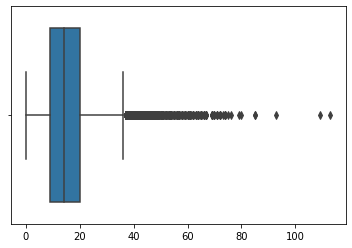

In [ ]:
sns.boxplot([len(sentence) for sentence in all_sentences])
plt.show()

In [41]:
sentences_padded = pad_sequences(all_sentences_numeric, maxlen=MAX_LENGTH, padding="pre", truncating="post")
tags_padded = pad_sequences(all_tags_numeric, maxlen=MAX_LENGTH, padding="pre", truncating="post")

In [42]:
print(sentences_padded[0])
print(tags_padded[0])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0 31178 46890  7878 95273 22813 60618  1795 43843 61434 79599 73873
 51713  1474 61132 85429 10682]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 2 5 2 5 5 2 5 2 5 3 3
 3 3]


In [43]:
word_index["_PAD_"] = 0
word_index["_OOV_"] = 1

tag_index["_PAD_"] = 0

In [44]:
sentences_padded.shape, tags_padded.shape

((41160, 113), (41160, 113))

In [45]:
from tensorflow.keras.utils import to_categorical

In [46]:
y = to_categorical(tags_padded)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sentences_padded, y, test_size=0.2, random_state = 24)

In [48]:
X_train.shape

(32928, 113)

In [49]:
X_test.shape

(8232, 113)

In [50]:
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Test Data: {X_test.shape}, {y_test.shape}")

Train Data: (32928, 113), (32928, 113, 6)
Test Data: (8232, 113), (8232, 113, 6)


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, TimeDistributed, Activation, Flatten, Dropout

In [52]:
VOCAB_SIZE = len(word_index)
NUM_CLASSES = len(tag_index)

In [54]:
model = Sequential()

model.add(Embedding(
    input_dim = VOCAB_SIZE,
    output_dim = 128,
    input_length = MAX_LENGTH
))

model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(0.25))

model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(0.25))

model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.25))

model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.25))

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.25))

model.add(Dense(64, activation="relu"))
model.add(Dropout(0.25))

model.add(TimeDistributed(Dense(NUM_CLASSES, activation="softmax")))

In [55]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 113, 128)          12529024  
_________________________________________________________________
bidirectional_4 (Bidirection (None, 113, 512)          788480    
_________________________________________________________________
dropout_6 (Dropout)          (None, 113, 512)          0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 113, 512)          1574912   
_________________________________________________________________
dropout_7 (Dropout)          (None, 113, 512)          0         
_________________________________________________________________
bidirectional_6 (Bidirection (None, 113, 256)          656384    
_________________________________________________________________
dropout_8 (Dropout)          (None, 113, 256)         

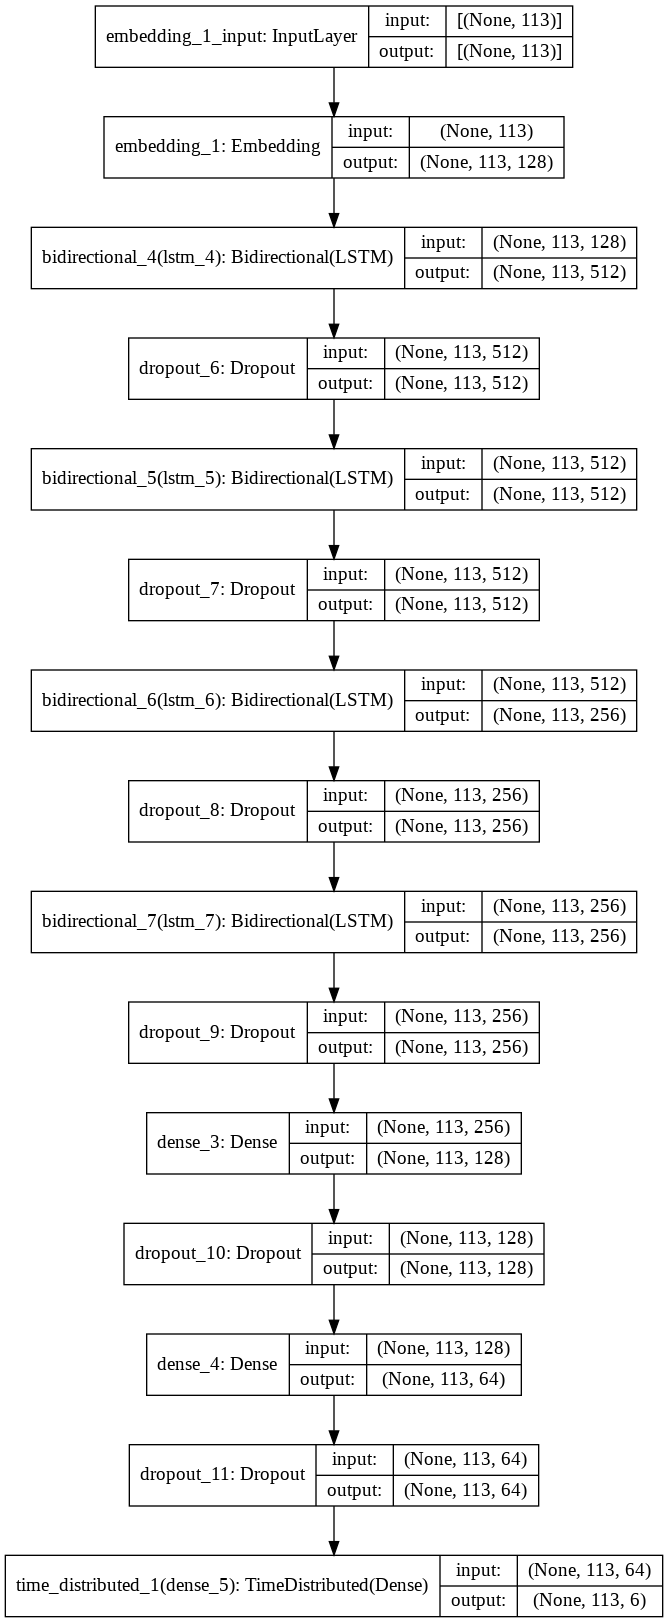

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='t0model.png', show_shapes=True, show_layer_names=True)

In [56]:
history = model.fit(
    X_train,y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=20
)

Epoch 1/20
258/258 [==============================] - 87s 275ms/step - loss: 0.2222 - accuracy: 0.9129 - val_loss: 0.1727 - val_accuracy: 0.9278
Epoch 2/20
258/258 [==============================] - 68s 263ms/step - loss: 0.1533 - accuracy: 0.9371 - val_loss: 0.0957 - val_accuracy: 0.9666
Epoch 3/20
258/258 [==============================] - 68s 263ms/step - loss: 0.0785 - accuracy: 0.9751 - val_loss: 0.0679 - val_accuracy: 0.9778
Epoch 4/20
258/258 [==============================] - 68s 263ms/step - loss: 0.0548 - accuracy: 0.9843 - val_loss: 0.0653 - val_accuracy: 0.9788
Epoch 5/20
258/258 [==============================] - 68s 263ms/step - loss: 0.0442 - accuracy: 0.9873 - val_loss: 0.0651 - val_accuracy: 0.9795
Epoch 6/20
258/258 [==============================] - 68s 263ms/step - loss: 0.0363 - accuracy: 0.9893 - val_loss: 0.0633 - val_accuracy: 0.9804
Epoch 7/20
258/258 [==============================] - 68s 263ms/step - loss: 0.0302 - accuracy: 0.9909 - val_loss: 0.0660 - val_ac

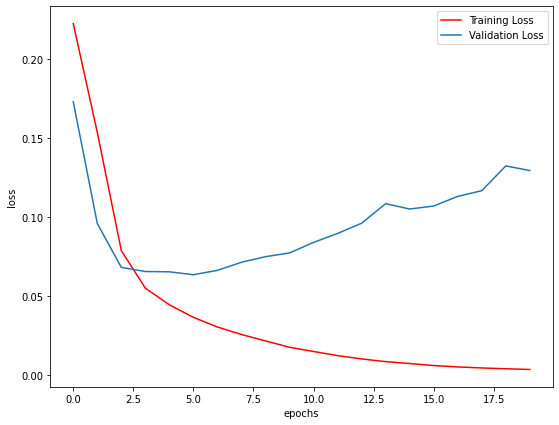

In [57]:
plt.figure(figsize=(9,7))
plt.plot(history.history['loss'], 'r', label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

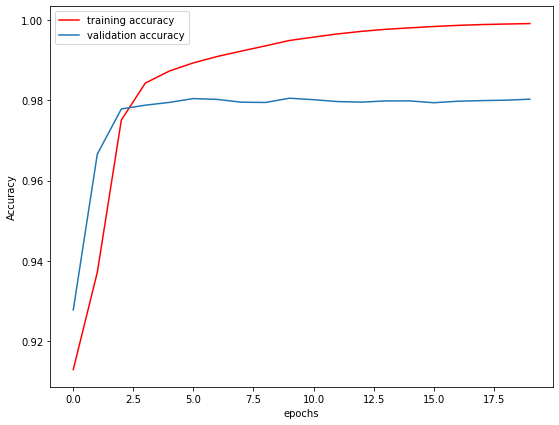

In [58]:
plt.figure(figsize=(9,7))
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [59]:
pred=model.predict(X_test)

In [ ]:
for i in pred[21]:
    print(np.argmax(i), end=" ")

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 5 5 5 5 5 2 1 5 4 4 

In [ ]:
for i in y_test[21]:
    print(np.argmax(i), end=" ")

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 5 2 2 5 1 2 5 5 4 4 

In [60]:
prediction=[]
for i in range(0,len(pred)):
  for j in pred[i]:
    prediction.append(np.argmax(j))

test=[]
for i in range(0,len(pred)):
  for j in y_test[i]:
    test.append(np.argmax(j))    

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [62]:
print(confusion_matrix(test,prediction))

[[802187      0      0      0      0      0]
 [     0  12831    206   1105    146   1240]
 [     0    195  23934   1645    279    302]
 [     0    581   1565  47598    392   2592]
 [     0    188    373    284   6274    131]
 [     0   1006    432   5540    149  19041]]


In [63]:
df=confusion_matrix(test,prediction)

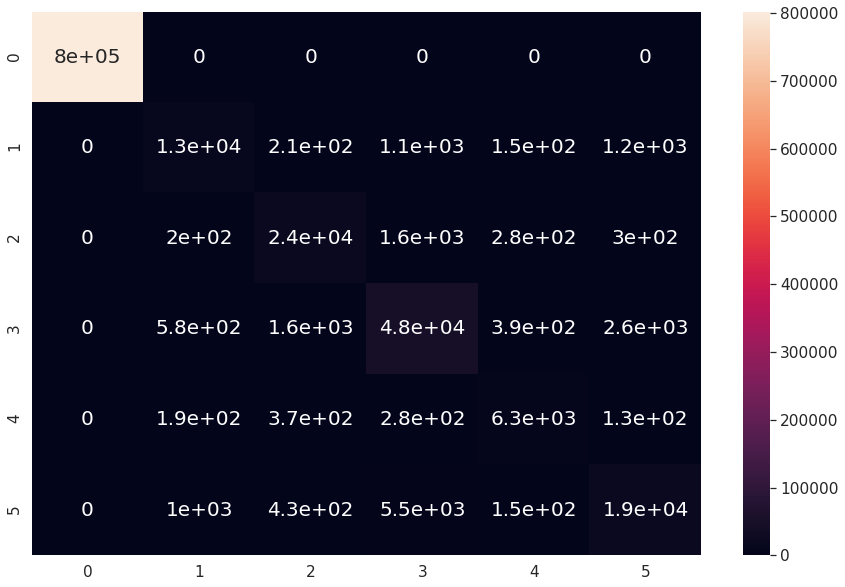

In [64]:
import seaborn as sns
df_cm = pd.DataFrame(df, range(6), range(6))
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 20}) # font size

plt.show()

In [67]:
tag_idx={'_PAD_': 0, 'a': 2, 'n': 3, 'r': 4, 'u': 5, 'v': 1}

In [69]:
print(classification_report(test,prediction,target_names=tag_idx))

              precision    recall  f1-score   support

       _PAD_       1.00      1.00      1.00    802187
           a       0.87      0.83      0.85     15528
           n       0.90      0.91      0.91     26355
           r       0.85      0.90      0.87     52728
           u       0.87      0.87      0.87      7250
           v       0.82      0.73      0.77     26168

    accuracy                           0.98    930216
   macro avg       0.88      0.87      0.88    930216
weighted avg       0.98      0.98      0.98    930216



In [ ]:
pred1=model.predict(X_train)

In [ ]:
for i in pred1[50]:
    print(np.argmax(i), end=" ")

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 5 2 5 2 4 5 2 5 5 5 2 1 5 5 5 1 1 4 2 2 1 5 2 1 2 1 1 1 4 1 5 

In [ ]:
for i in y_train[50]:
    print(np.argmax(i), end=" ")

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 5 2 5 2 4 5 2 5 5 5 2 1 5 5 5 1 1 4 2 2 1 5 2 1 2 1 1 1 4 1 5 

In [ ]:
def preprocess_input_text(text, MAXLEN=MAX_LENGTH,word_index=word_index):
    sentence = text.split(" ")
    sentence_numeric = []
    for word in sentence:
        try:
            sentence_numeric.append(word_index[word])
        except:
            sentence_numeric.append(word_index["_OOV_"])
    sentence_numeric = pad_sequences([sentence_numeric], maxlen=MAXLEN, padding="pre",truncating="post")
    return sentence_numeric.reshape((113,))

In [ ]:
x = preprocess_input_text("एक ५०० मीटर लांबीची स्की लिफ्ट स्कीअर्सना उताराच्या माथ्यावर आणून सोडते . त्यामुळे एवढे अंतर परत चढण्याचा त्यांचा त्रास आणि वेळ त्यामुळे वाचतो . चढाई न झालेल्या ठिकाणांना भेटी देणे ज्यांना आवडते अशांना भारतातील पर्वतरांगांमधील श्वास रोखून धरायला लावणारे , उत्साहित करणारे मार्ग उपलब्ध आहेत . टरेकिंग एक खेळ असला तरी त्याला पूर्व प्रशिक्षण अथवा सरावाची गरज नसते. फक्त ट्रेकरची शारीरिक स्थिती उत्तम असावी . त्याशिवाय ट्रेकिंग करताना काही करायच्या आणि काही टाळायच्या गोष्टी असतात. त्यांचे त्याने पालन केले पाहिजे . पश्चिम किना~य़ावर मुंबई , गोवा आणि पुण्याच्या तलावांवर सेलिंग हा खेळ अनुभवता येतो . रिव्हर राफ्टिंगसाठी सर्वोत्तम काळ हा एप्रिल ते सप्टेंबर आहे")

In [ ]:
x=x.reshape(1,MAX_LENGTH)

In [ ]:
pred2=model.predict(x)
pred2.shape

(1, 113, 6)

In [ ]:
for i in pred2[0]:
    print(np.argmax(i), end=" ")

0 0 0 0 0 0 0 0 0 2 1 5 5 2 5 1 5 5 1 1 5 3 3 5 4 1 1 5 3 5 3 1 5 5 2 1 5 1 1 1 2 1 1 5 5 1 1 1 2 2 1 5 2 4 5 5 2 5 2 2 1 5 5 1 5 5 1 2 1 2 5 2 1 5 1 1 4 5 1 3 5 1 5 1 1 1 2 4 4 5 5 1 5 2 5 3 1 5 1 2 5 5 1 5 1 1 2 5 2 5 2 5 5 

In [68]:
tag_index

In [ ]:
model_json = model.to_json()
with open("t0model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("t0model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
import pickle

In [ ]:
pickle.dump(word_index, open("t0word_index.pkl","wb"))
pickle.dump(tag_index, open("t0pos_index.pkl", "wb"))

In [2]:
from tensorflow.keras.models import model_from_json
with open('t0model.json','r') as f:
    json = f.read()
model = model_from_json(json)
#best m0del weight
model.load_weights("t0model.h5")